In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("covid-variants.csv")

In [75]:
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [76]:
location = df['location'].unique()

In [77]:
location

array(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal',
       'Netherlands', 'New

In [78]:
variant = df['variant'].unique()

In [79]:
variant

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [80]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [82]:
df.apply(lambda x: x.nunique())

location                121
date                     45
variant                  24
num_sequences          1563
perc_sequences         3600
num_sequences_total    1247
dtype: int64

## **Number of unique location(countries) where variants have been found**

In [83]:
len(location)

121

#**Number of unique variants of covid discovered till date**

In [84]:
len(variant)

24

##Regression plot of number of sequences versus total number of sequences

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


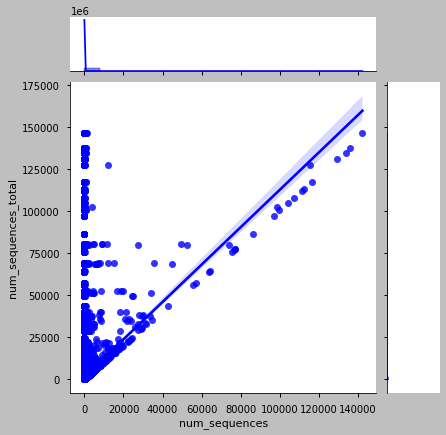

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-notebook')
sns.jointplot(df.num_sequences, df.num_sequences_total, kind='reg', color='b')
plt.show()

##Frequency of location(countries) from where variants have been reported

In [86]:
data = []

for location in df['location'].unique():
  data.append([location , len(df[df['location'] == location])])

b = pd.DataFrame(data, columns = ['location','freq']).sort_values(by = 'freq', ascending = False)

In [87]:
b

,location,freq
6,Bangladesh,1080
7,Belgium,1080
116,United States,1080
115,United Kingdom,1080
34,France,1080
...,...,...
73,Montenegro,384
71,Monaco,360
32,Fiji,336
9,Benin,336


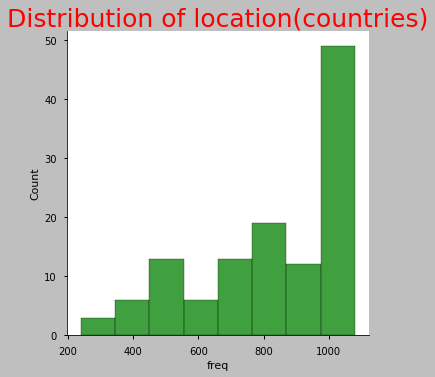

In [88]:
sns.displot(b.freq, color='g')
plt.title('Distribution of location(countries)', fontsize = 25, color='r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


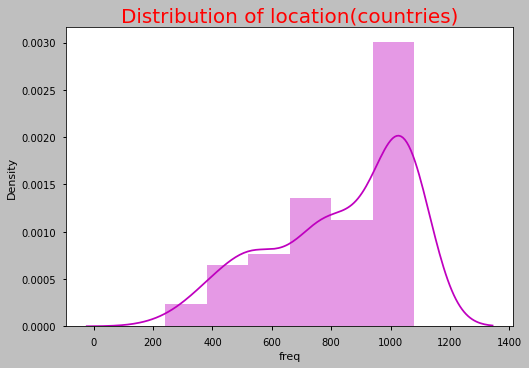

In [89]:
plt.style.use('grayscale')

sns.distplot(b.freq, color='m')
plt.title('Distribution of location(countries)', fontsize = 20, color='r')
plt.show()

##Frequency of date on which covid variants have been uploaded

In [90]:
data = []

for date in df['date'].unique():
  data.append([date , len(df[df['date'] == date])])

c = pd.DataFrame(data, columns = ['date','freq']).sort_values(by = 'freq', ascending = True)

In [91]:
c

,date,freq
44,2022-01-05,288
43,2021-12-27,1536
29,2020-05-25,1728
0,2020-07-06,1776
33,2020-08-03,1848
28,2020-05-11,1872
30,2020-06-08,1872
31,2020-06-22,1896
32,2020-07-20,1896
35,2020-09-14,2016


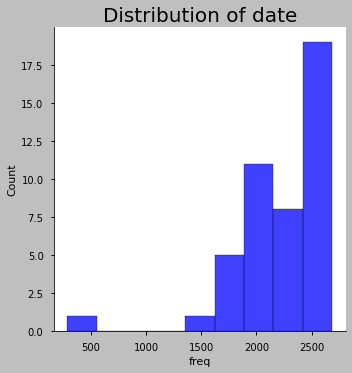

In [92]:
sns.displot(c.freq, color='b')
plt.title('Distribution of date', fontsize = 20, color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


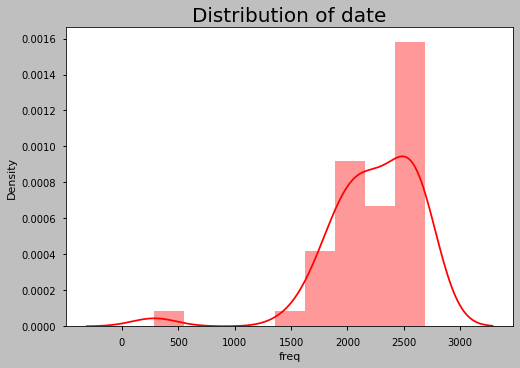

In [93]:
plt.style.use('grayscale')

sns.distplot(c.freq, color='r')
plt.title('Distribution of date', fontsize = 20, color='black')
plt.show()

#Covid variants found in India

In [94]:
a = df.groupby(['location']).get_group('India')

In [95]:
a

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
36360,India,2020-05-11,Alpha,0,0.00,471
36361,India,2020-05-11,B.1.1.277,0,0.00,471
36362,India,2020-05-11,B.1.1.302,0,0.00,471
36363,India,2020-05-11,B.1.1.519,0,0.00,471
36364,India,2020-05-11,B.1.160,0,0.00,471
...,...,...,...,...,...,...
37411,India,2021-12-27,Omicron,174,34.87,499
37412,India,2021-12-27,S:677H.Robin1,0,0.00,499
37413,India,2021-12-27,S:677P.Pelican,0,0.00,499
37414,India,2021-12-27,others,21,4.21,499


In [96]:
a['variant'].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [97]:
len(a['variant'].unique())

24

In [98]:
data = []

for variant in a['variant'].unique():
  data.append([variant , len(a[a['variant'] == variant])])

pd.DataFrame(data, columns = ['variant','freq']).sort_values(by = 'freq', ascending = True)

,variant,freq
0,Alpha,44
21,S:677P.Pelican,44
20,S:677H.Robin1,44
19,Omicron,44
18,Mu,44
17,Lambda,44
16,Kappa,44
15,Iota,44
14,Gamma,44
13,Eta,44


In [99]:
a['date'].unique()

array(['2020-05-11', '2020-05-25', '2020-06-08', '2020-06-22',
       '2020-07-06', '2020-07-20', '2020-08-03', '2020-08-17',
       '2020-08-31', '2020-09-14', '2020-09-28', '2020-10-12',
       '2020-10-26', '2020-11-09', '2020-11-23', '2020-12-07',
       '2020-12-21', '2021-01-04', '2021-01-11', '2021-01-25',
       '2021-02-08', '2021-02-22', '2021-03-08', '2021-03-22',
       '2021-04-05', '2021-04-19', '2021-05-03', '2021-05-17',
       '2021-05-31', '2021-06-14', '2021-06-28', '2021-07-12',
       '2021-07-26', '2021-08-09', '2021-08-23', '2021-09-06',
       '2021-09-20', '2021-10-04', '2021-10-18', '2021-11-01',
       '2021-11-15', '2021-11-29', '2021-12-13', '2021-12-27'],
      dtype=object)

In [100]:
len(a['date'].unique())

44

In [101]:
data = []

for date in a['date'].unique():
  data.append([date , len(a[a['date'] == date])])

pd.DataFrame(data, columns = ['date','freq']).sort_values(by = 'freq', ascending = False)

,date,freq
0,2020-05-11,24
1,2020-05-25,24
24,2021-04-05,24
25,2021-04-19,24
26,2021-05-03,24
27,2021-05-17,24
28,2021-05-31,24
29,2021-06-14,24
30,2021-06-28,24
31,2021-07-12,24


##Thank You